# AI-Based District Health Infrastructure Stress Analysis

This prototype demonstrates how AI can be applied to Indian government datasets
to identify and prioritize districts with critical healthcare infrastructure stress.

**Datasets used**
- Census of India (District Population)
- Ministry of Health & Family Welfare (PHC Infrastructure)

**AI Technique**
- Unsupervised Learning (K-Means Clustering)


In [8]:
import pandas as pd

df = pd.read_csv("dhisi_ai_enhanced.csv")
df.head()


,state,district,population,phcs,population_per_phc,stress_score,stress_category,ai_cluster,ai_risk_level
0,jammu and kashmir,0,12541302,637,19688.072214,0.584404,Low Stress,0,Low
1,jammu and kashmir,1,870354,637,1366.332810,0.038711,Low Stress,0,Low
2,jammu and kashmir,2,753745,637,1183.273155,0.033259,Low Stress,0,Low
3,jammu and kashmir,3,133487,637,209.555730,0.004258,Low Stress,0,Low
4,jammu and kashmir,4,140802,637,221.039246,0.004600,Low Stress,0,Low


In [9]:
df['ai_risk_level'].value_counts()

ai_risk_level
Low         666
Moderate      6
Critical      1
Name: count, dtype: int64

In [10]:
critical = df[df['ai_risk_level'] == 'Critical'] \
    .sort_values(by='population_per_phc', ascending=False)

critical[['state', 'district', 'population_per_phc']].head(10)

,state,district,population_per_phc
93,delhi,0,3357588.2


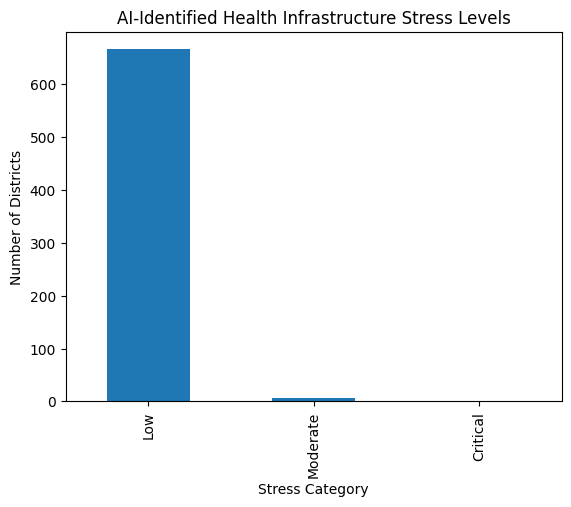

In [11]:
import matplotlib.pyplot as plt

df['ai_risk_level'].value_counts().plot(kind='bar')
plt.title("AI-Identified Health Infrastructure Stress Levels")
plt.xlabel("Stress Category")
plt.ylabel("Number of Districts")
plt.show()

## AI-Based What-If Scenario: Increasing PHCs by 10%

In [12]:
# Simulate a 10% increase in PHCs
df['phcs_plus_10pct'] = df['phcs'] * 1.10

# Recalculate population pressure
df['new_population_per_phc'] = df['population'] / df['phcs_plus_10pct']

# Compare before vs after
df[['population_per_phc', 'new_population_per_phc']].head()


,population_per_phc,new_population_per_phc
0,19688.072214,17898.247467
1,1366.332810,1242.120736
2,1183.273155,1075.702869
3,209.555730,190.505209
4,221.039246,200.944770


In [13]:
df['improvement'] = df['population_per_phc'] - df['new_population_per_phc']
df['improvement'].describe()


count       673.000000
mean       1304.347679
std       12595.619241
min           6.053702
25%          82.958871
50%         135.716527
75%         244.976134
max      305235.290909
Name: improvement, dtype: float64

## Key Insight

Using unsupervised AI on Indian government health data allows automatic identification
of critically stressed districts, enabling targeted policy intervention instead of uniform allocation.

This approach is scalable, explainable, and reproducible.